In [21]:
import numpy as np 
import pandas as pd
import scipy
from scipy.stats import zscore
import seaborn as sns

dataset = "dataframe_new.csv" 
df = pd.read_csv(dataset) # dataframe in pandas
df

,no,target,t,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,1,7,0,3.083152,3139.218,6280.890,1007.456,49.544,0.0,172.206,...,915.445,0.0,598.754,0.000,6.0,0.200000,0.2,6.2,17978.907000,0.0
1,1,7,1,3.790084,731.429,4962.918,93.324,21.076,0.0,0.000,...,37.305,0.0,117.621,0.000,3.0,0.600000,0.5,6.4,6142.161000,1.0
2,1,7,2,2.141117,1286.246,5237.319,94.346,43.403,0.0,0.000,...,0.000,0.0,30.086,30.386,0.0,0.200000,0.8,6.8,6773.832001,0.0
3,1,7,3,1.895065,866.956,9270.629,976.971,34.106,0.0,3.010,...,419.805,0.0,178.732,0.000,10.0,0.800000,0.0,6.0,15047.351001,0.0
4,2,7,0,3.790084,731.429,4962.918,93.324,21.076,0.0,0.000,...,37.305,0.0,117.621,0.000,3.0,0.600000,0.5,6.4,6142.161000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,1048,7,3,2.479228,2551.046,1936.415,614.706,0.000,0.0,357.909,...,0.000,0.0,30.666,0.000,10.0,0.000000,1.2,8.2,14320.867998,1.0
4192,1049,7,0,1.497619,1048.739,1235.537,688.769,0.000,0.0,130.530,...,0.000,0.0,0.000,0.000,10.0,-0.400000,0.0,5.4,18925.187999,3.0
4193,1049,7,1,0.304902,726.391,2078.403,124.694,0.000,0.0,0.000,...,0.000,0.0,56.173,0.000,1.0,-0.600000,0.4,6.2,4089.879001,2.0
4194,1049,7,2,2.479228,2551.046,1936.415,614.706,0.000,0.0,357.909,...,0.000,0.0,30.666,0.000,10.0,0.000000,1.2,8.2,14320.867998,1.0


<AxesSubplot:>

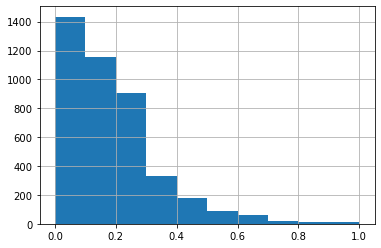

In [22]:
# normalize data
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
mms = MinMaxScaler() # between 0-1 , keeps distribution
df[['call', 'sms', 'circumplex.arousal', 'circumplex.valence', 'mood', 'activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.other', 'appCat.social', 'appCat.unknown', 'appCat.utilities', 'screen', 'appCat.finance', 'appCat.office', 'appCat.travel', 'appCat.weather', 'appCat.game']] = mms.fit_transform(df[['call', 'sms', 'circumplex.arousal', 'circumplex.valence', 'mood', 'activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.other', 'appCat.social', 'appCat.unknown', 'appCat.utilities', 'screen', 'appCat.finance', 'appCat.office', 'appCat.travel', 'appCat.weather', 'appCat.game']])
df['activity'].hist()

In [ ]:
df['call'].mean()

0.06982072019434783

In [23]:
def filter_outliers(df, category):
    q_hi = df[category].quantile(0.99) # quantiles
    q_low = df[category].quantile(0.01)
    median = df[category].median()  # median
    df[category] = np.where(df[category] > q_hi, median, df[category])
    df[category] = np.where(df[category] < q_low, median, df[category])
    return df
categories = ['call', 'sms', 'circumplex.arousal', 'circumplex.valence', 'mood', 'activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.other', 'appCat.social', 'appCat.unknown', 'appCat.utilities', 'screen', 'appCat.finance', 'appCat.office', 'appCat.travel', 'appCat.weather', 'appCat.game']

for category in categories:
    df = filter_outliers(df, category)

In [5]:
df

,no,target,t,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,1,7,0,0.267275,0.691904,0.303150,0.028033,0.037502,0.0,0.005174,...,0.000000,0.0,0.000000,0.0,0.193548,0.55,0.446154,0.505263,0.136433,0.000000
1,1,7,1,0.328558,0.671954,0.239538,0.002597,0.015953,0.0,0.000000,...,0.004552,0.0,0.052099,0.0,0.096774,0.65,0.538462,0.536842,0.169654,0.066667
2,1,7,2,0.185611,0.676551,0.252782,0.002625,0.032854,0.0,0.000000,...,0.000000,0.0,0.013326,0.0,0.000000,0.55,0.630769,0.600000,0.187101,0.000000
3,1,7,3,0.164281,0.673077,0.096672,0.027185,0.025816,0.0,0.000090,...,0.051229,0.0,0.079168,0.0,0.032258,0.70,0.384615,0.473684,0.415626,0.000000
4,2,7,0,0.328558,0.671954,0.239538,0.002597,0.015953,0.0,0.000000,...,0.004552,0.0,0.052099,0.0,0.096774,0.65,0.538462,0.536842,0.169654,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,1048,7,3,0.214921,0.687031,0.093462,0.017105,0.000000,0.0,0.000000,...,0.000000,0.0,0.013583,0.0,0.032258,0.50,0.753846,0.631579,0.395559,0.066667
4192,1049,7,0,0.129827,0.674583,0.059634,0.019166,0.000000,0.0,0.003922,...,0.000000,0.0,0.000000,0.0,0.032258,0.40,0.384615,0.631579,0.136433,0.200000
4193,1049,7,1,0.026432,0.671912,0.100315,0.003470,0.000000,0.0,0.000000,...,0.000000,0.0,0.024881,0.0,0.032258,0.35,0.507692,0.505263,0.112967,0.133333
4194,1049,7,2,0.214921,0.687031,0.093462,0.017105,0.000000,0.0,0.000000,...,0.000000,0.0,0.013583,0.0,0.032258,0.50,0.753846,0.631579,0.395559,0.066667


In [16]:
# store as csv file 
df.to_csv('dataframe_normalized_outliers_removed.csv')